Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from joblib import dump
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

Load and Preprocess Data

In [3]:
df = pd.read_csv('framingham.csv')

Data Cleaning

In [4]:
df.rename(columns={'TenYearCHD':'target'},inplace=True)
df.rename(columns={'male':'gender'},inplace=True)
df = df.drop(['education'], axis=1)

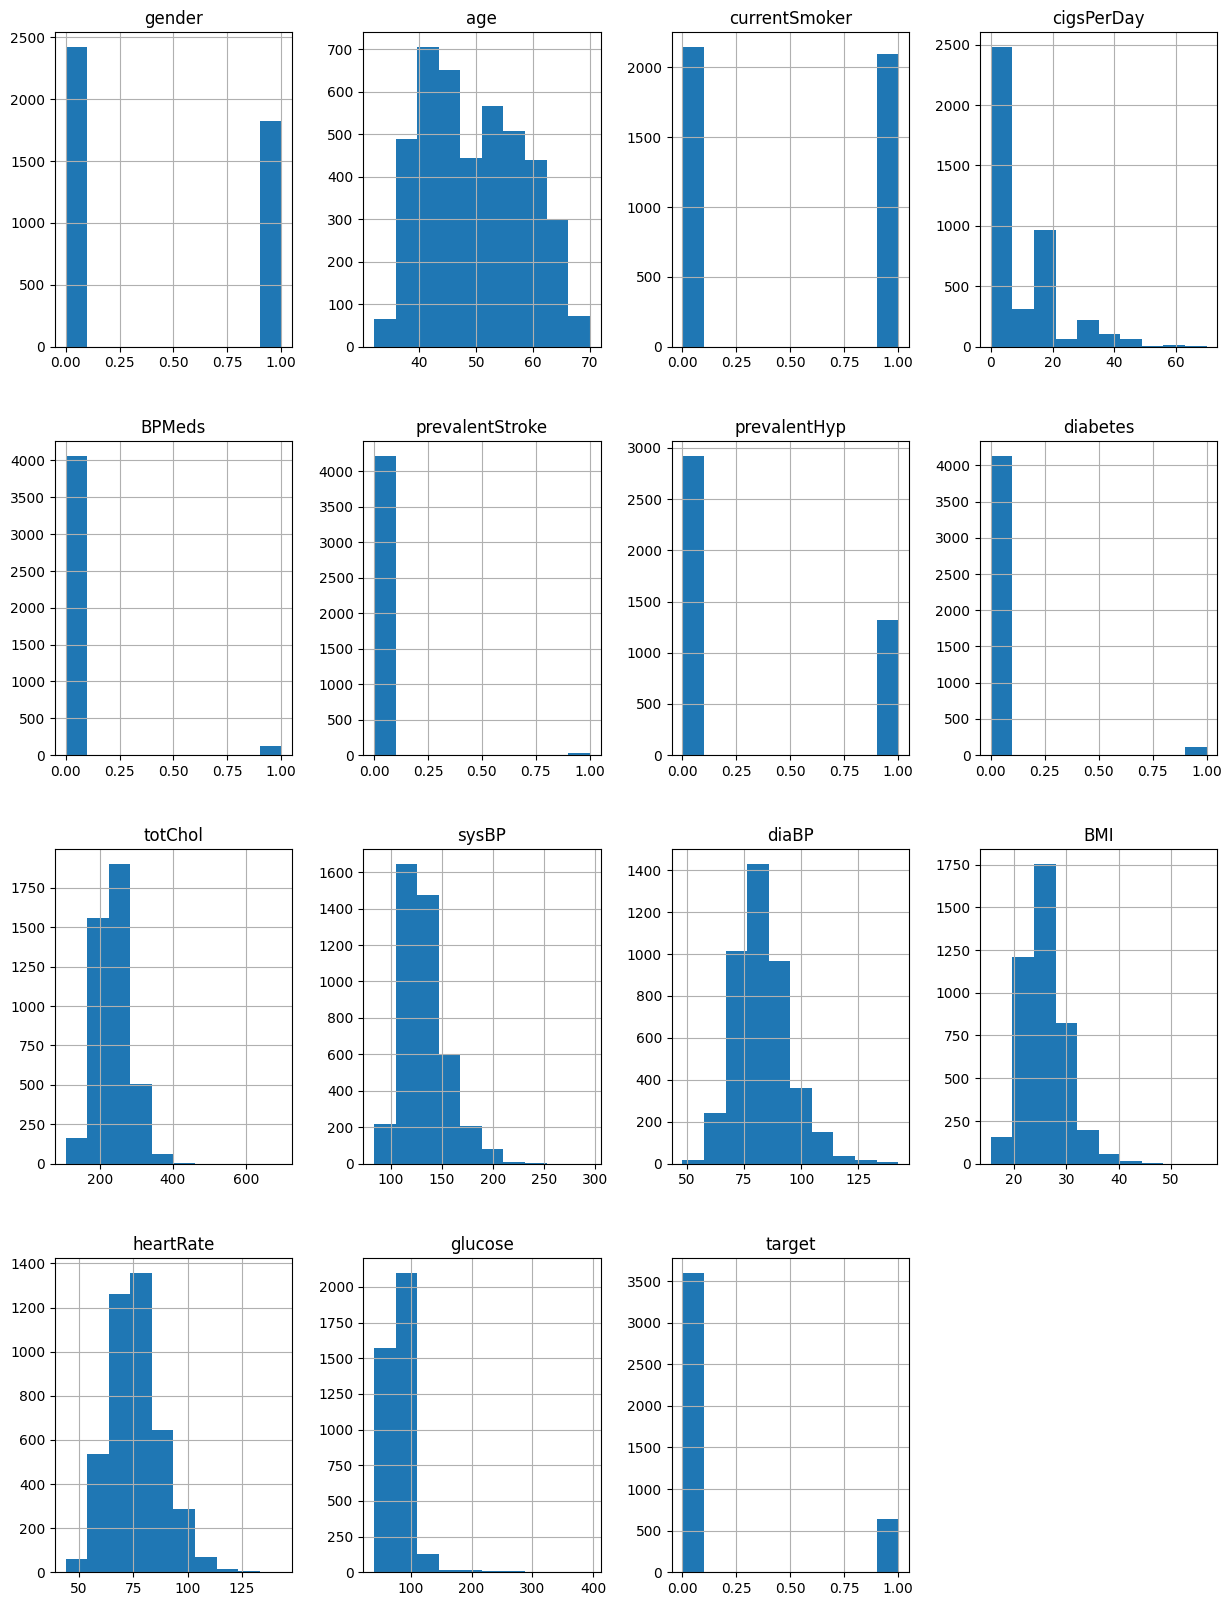

In [5]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.savefig("Data_Distribution.png")
plt.show()

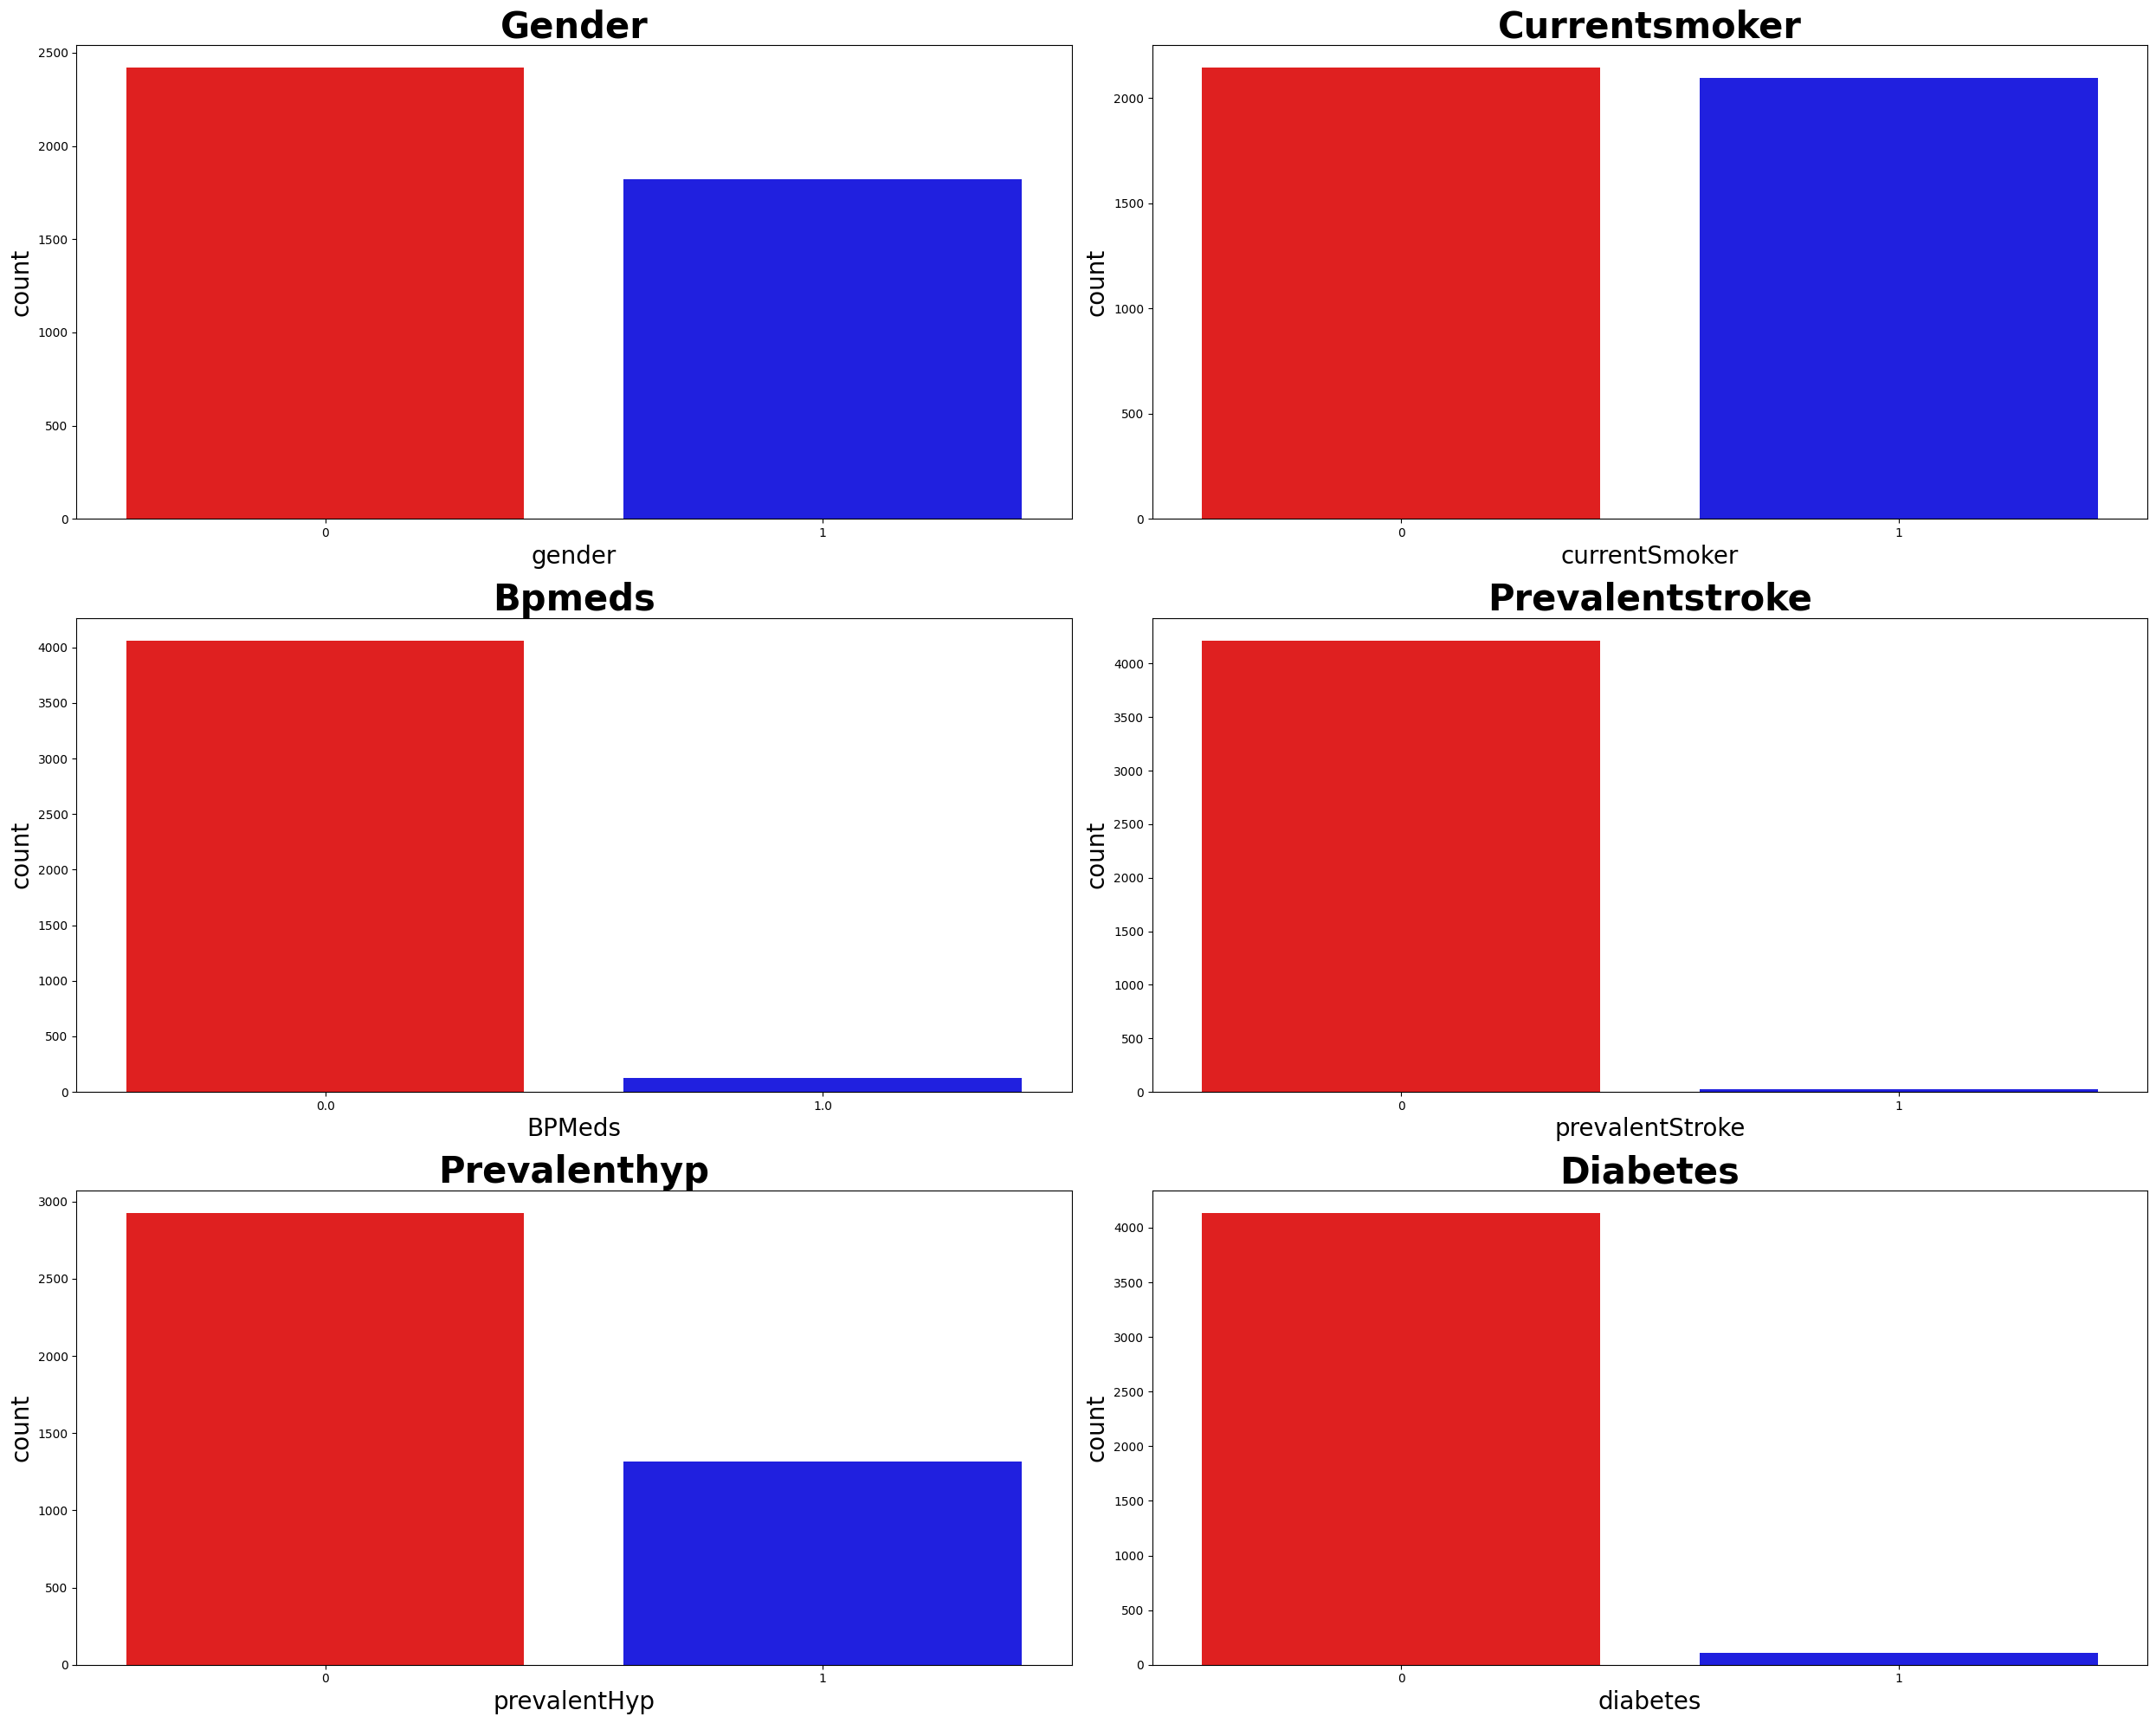

In [6]:
category=[i for i in df.columns if len(df[i].unique())<4]
random=[i for i in df.columns if len(df[i].unique())>=4]

category.remove("target")

plt.figure(figsize=(25,20))

colors = ['red', 'blue']  # Define a list of two colors, red and blue

for n, column in enumerate(category):
    plot = plt.subplot(3, 2, n+1)
    plt.xlabel(column, fontsize=20)
    plt.ylabel("COUNT", fontsize=20)
    sns.countplot(x=df[column], palette=colors, data=df)  # Use palette=colors to assign colors to the countplot
    plt.title(f'{column.title()}', weight='bold', fontsize=30)
    plt.tight_layout()

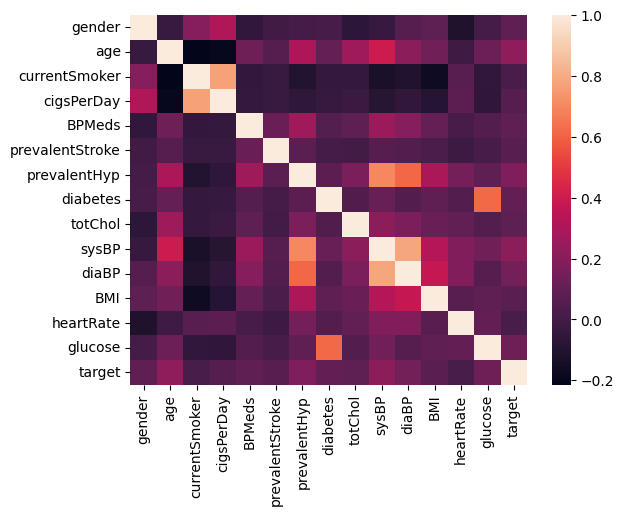

In [7]:
df_corr = df.corr()
sns.heatmap(df_corr)
plt.savefig("Features_Heat.png")
plt.show()

Split the Data

In [8]:
# Split the dataset into features and labels
features = df.drop(columns=['target'])
labels = df['target']

In [9]:
X = df.drop('target', axis=1)
y = df['target']
# Drop rows with missing values
df.dropna(inplace=True)
# Replace NaN values with zeros
df.fillna(0, inplace=True)
features

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:

class_weights = {0: 1, 1: 5}


pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    MinMaxScaler(),
    LogisticRegression(class_weight=class_weights)
)

In [12]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight={0: 1, 1: 5}))])

In [13]:
# Predict the labels for the testing data
y_pred = pipeline.predict(X_test)

In [14]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.6910377358490566
Precision: 0.2526690391459075
Recall: 0.5772357723577236
F1 score: 0.35148514851485146


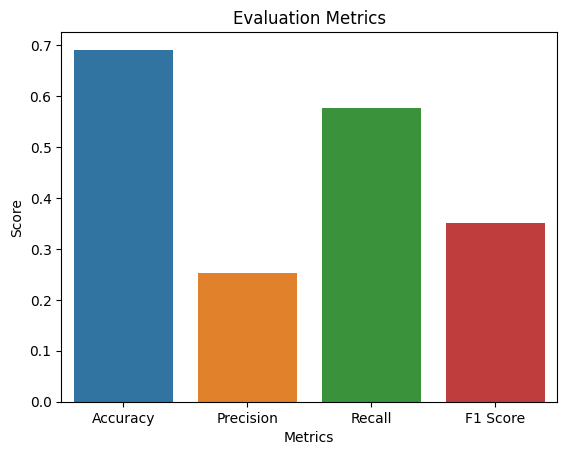

In [15]:
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
    # 'Log Loss': loss
}

# Convert the dictionary to lists for plotting
metric_names = list(metrics.keys())
metric_scores = list(metrics.values())

# Plot the F1 score using seaborn's barplot
sns.barplot(x=metric_names, y=metric_scores)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics')
plt.show()


In [16]:
# Evaluate the model on the testing data
loss = pipeline.score(X_test, y_test)
print(f"Test Loss: {loss:.4f}")

dump(pipeline, 'trained_model.pkl', protocol=4)

Test Loss: 0.6910


['trained_model.pkl']

In [17]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

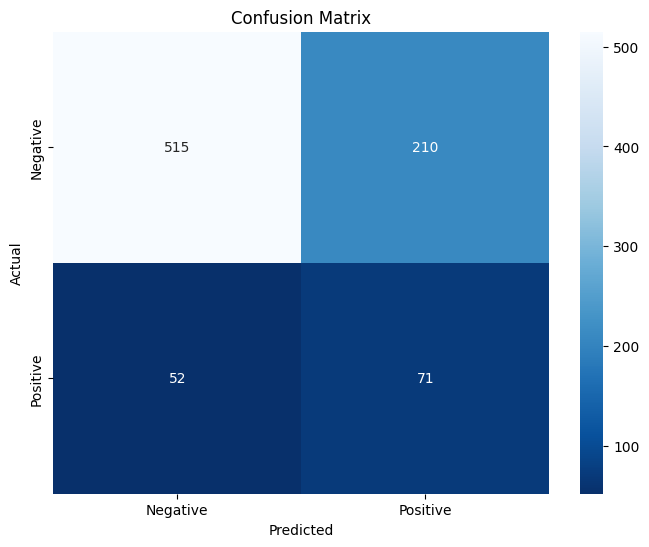

In [18]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
plt.show()

In [36]:
# from pickle import load 
# model_path = 'trained_model.pkl'

# def test_model(model_path):
#     # Load the saved model
#     with open(model_path, 'rb') as file:
#         model = load(file)

#     # Get user input
#     age = float(input('Enter age: '))
#     gender = int(input('Enter sex (0 for female, 1 for male): '))
#     smoke = float(input('Enter Number of Sticks per day: '))
#     bPMEd = float(input('Enter Number of BP MED: '))
#     everStroke = bool(input('Enter Ever had Stroke (0: No, 1: Yes): '))
#     # Add the remaining input features here...

#     # Create a DataFrame from the user input
#     input_data = pd.DataFrame([[age, sex]], columns=['age', 'sex'])

#     # Make predictions using the loaded model
#     predictions = model.predict(input_data)

#     # Print the predictions
#     print('Predicted class:', predictions[0])

# # Test the model
# test_model(model_path)